In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

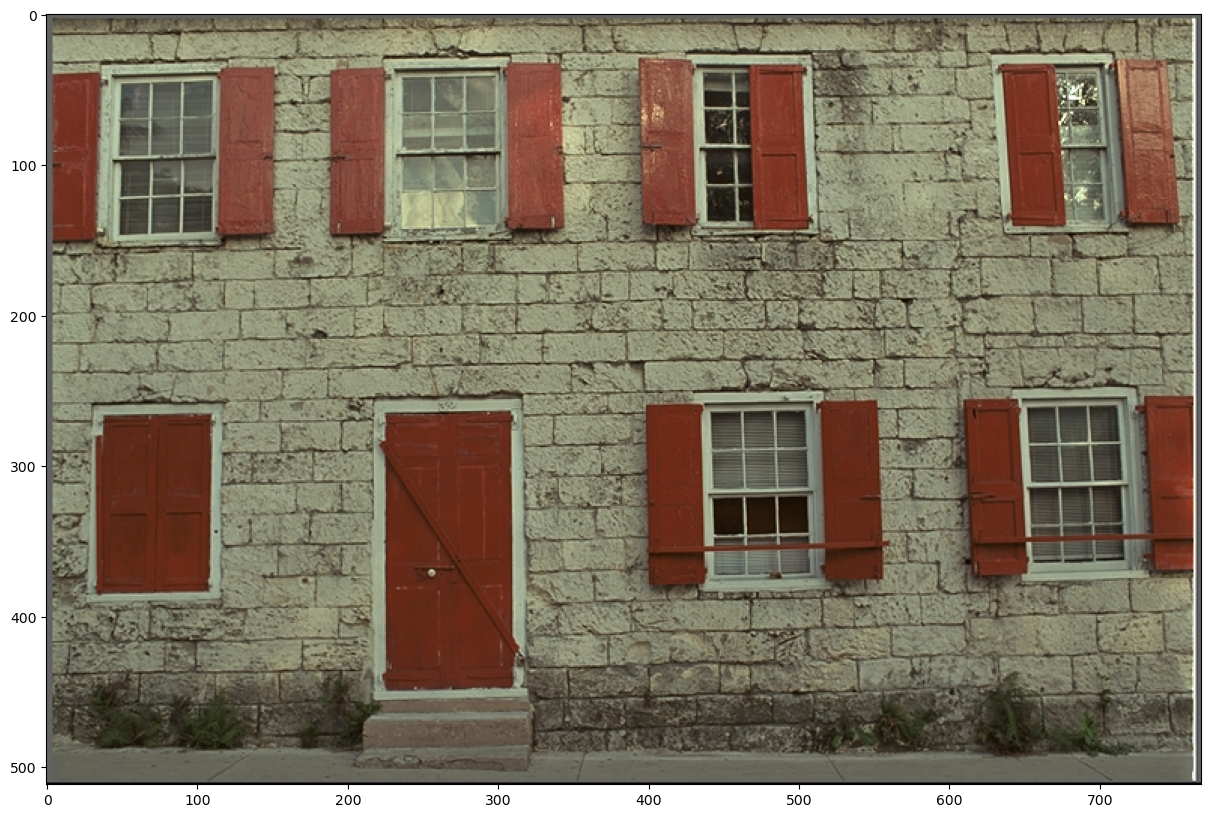

In [29]:
img = cv2.imread('kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

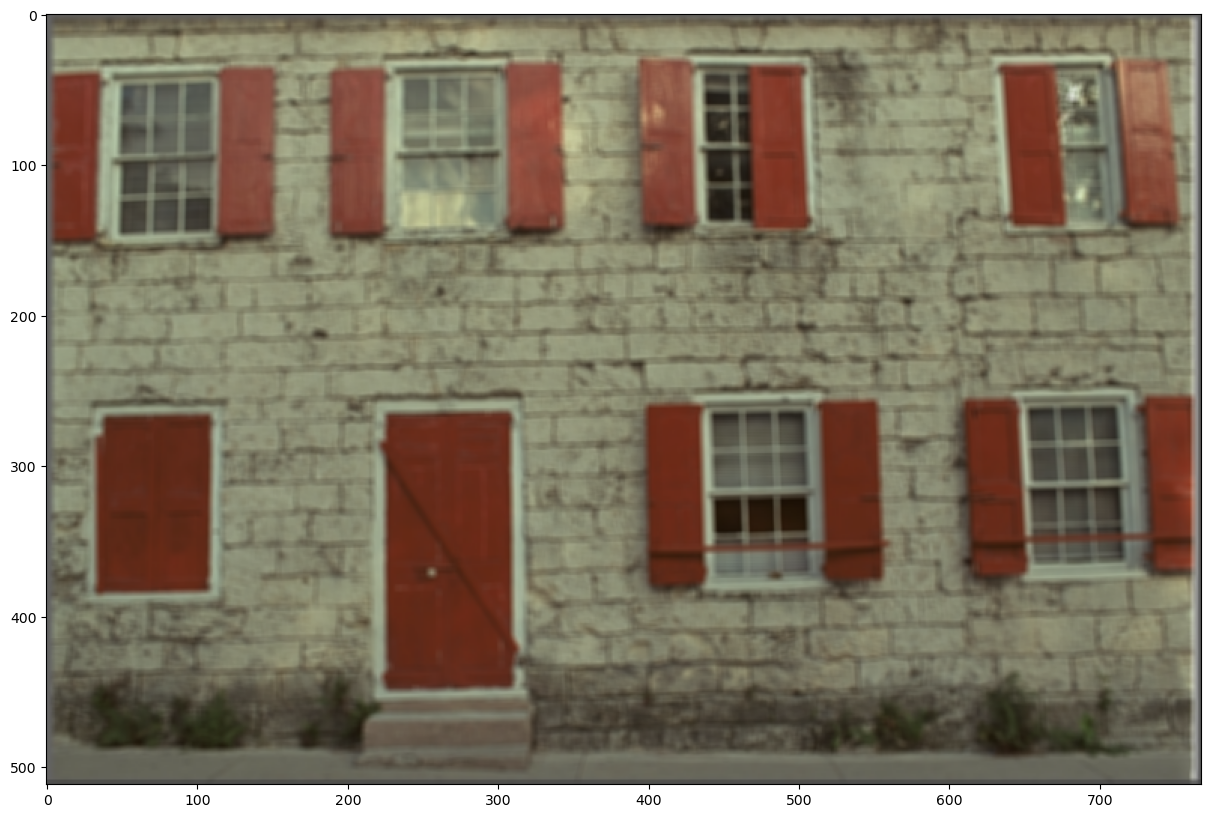

In [30]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=5)
plt.imshow(unsharp)

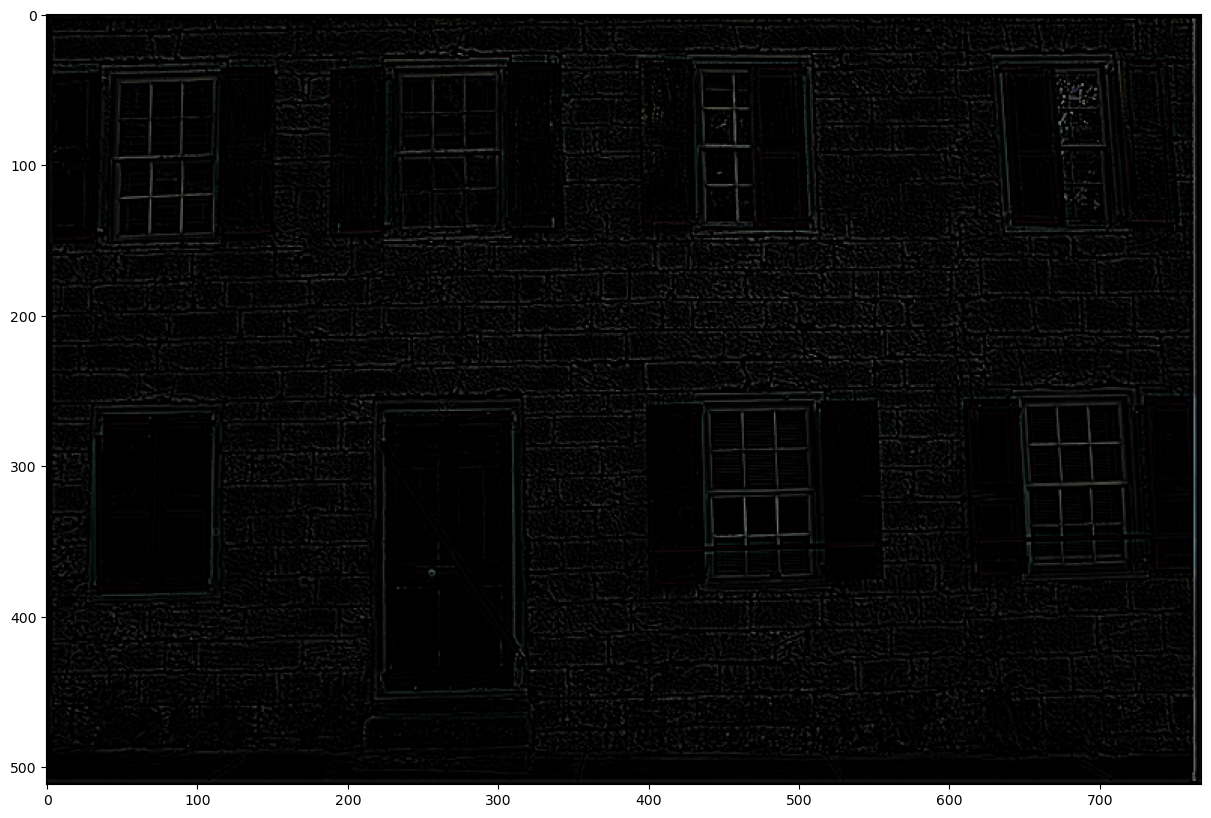

In [31]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.

img = img/255
unsharp = unsharp/255

diff = img - unsharp

diff[diff > 1] = 1
diff[diff < 0] = 0

plt.imshow(diff)

(<Axes: title={'center': 'Contrast, amount = 1'}>,
 Text(0.5, 1.0, 'Contrast, amount = 1'))

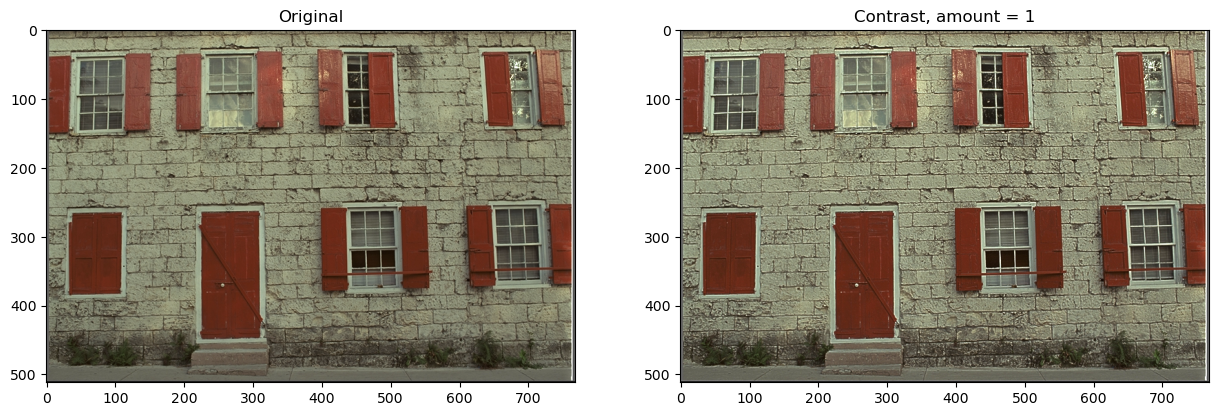

In [51]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
#amount = 0.7
amount = 1
#amount = 1.5

sharpened = img + diff * amount

sharpened[sharpened > 1] = 1
sharpened[sharpened < 0] = 0

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(sharpened), plt.title('Contrast, amount = ' + str(amount))

